In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

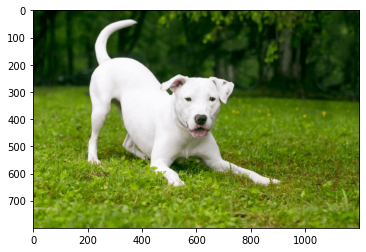

In [5]:
image = cv2.imread("../data/query_dog.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
scales = [1, 2, 2.5, 3]
orientations = np.arange(0, np.pi, np.pi / 6)
def build_filters():
 filters = []
 for scale in scales:
  for theta in orientations:
    kern = cv2.getGaborKernel((60, 60), 5.0, theta, 6.5, 0.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    # scale unformly by scale and crop to fit
    kern = cv2.resize(kern, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    # crop a square from the center of the kernel
    kern = kern[int(kern.shape[0]/2)-14:int(kern.shape[0]/2)+14, int(kern.shape[1]/2)-14:int(kern.shape[1]/2)+14]
    filters.append(kern)
 return filters

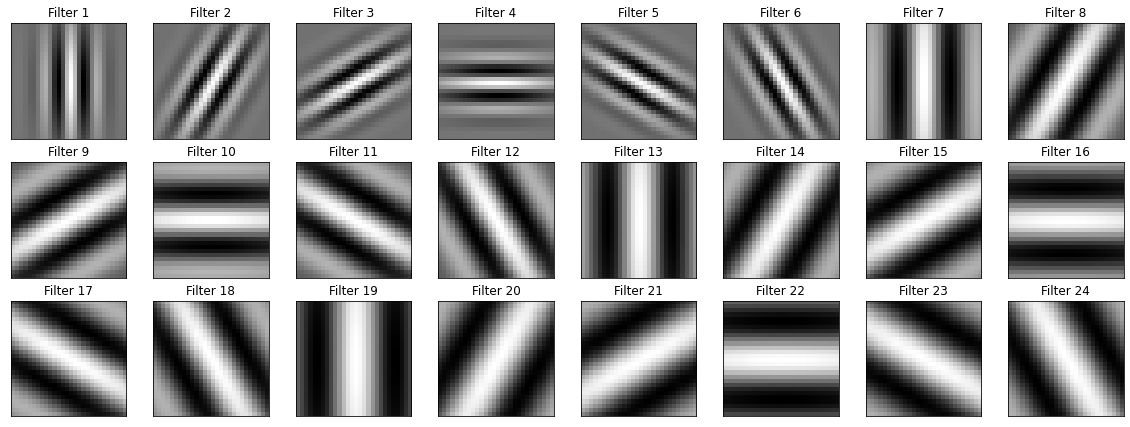

In [7]:
# visualize all the filters, theres 48 of them
filters = build_filters()
fig = plt.figure(figsize=(20, 20))
for i in range(len(filters)):
  ax = fig.add_subplot(8, 8, i+1)
  ax.imshow(filters[i], cmap=plt.cm.gray)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title('Filter %i' % (i + 1))
plt.show()

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_images = []
for kernel in filters:
  filtered_image = cv2.filter2D(gray_image, cv2.CV_8UC3, kernel)
  filtered_images.append(filtered_image)

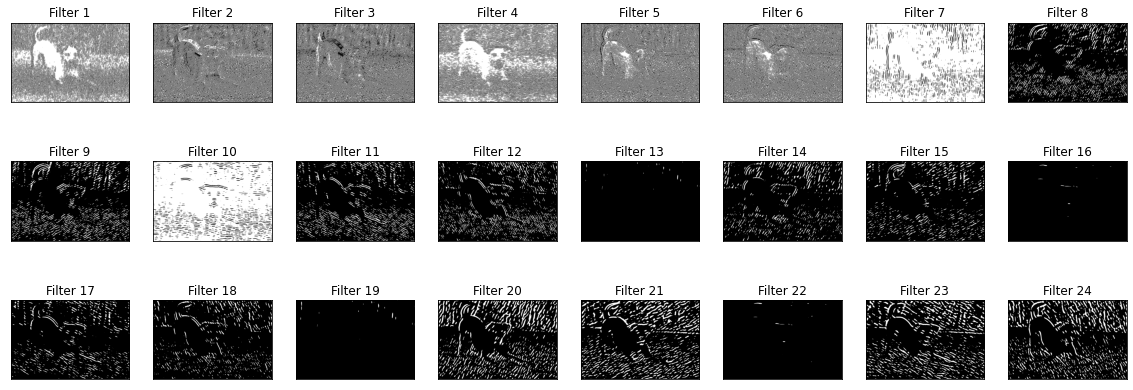

In [9]:
plt.figure(figsize=(20, 20))
for i in range(len(filtered_images)):
  ax = plt.subplot(8, 8, i+1)
  ax.imshow(filtered_images[i], cmap=plt.cm.gray)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title('Filter %i' % (i + 1))
plt.show()

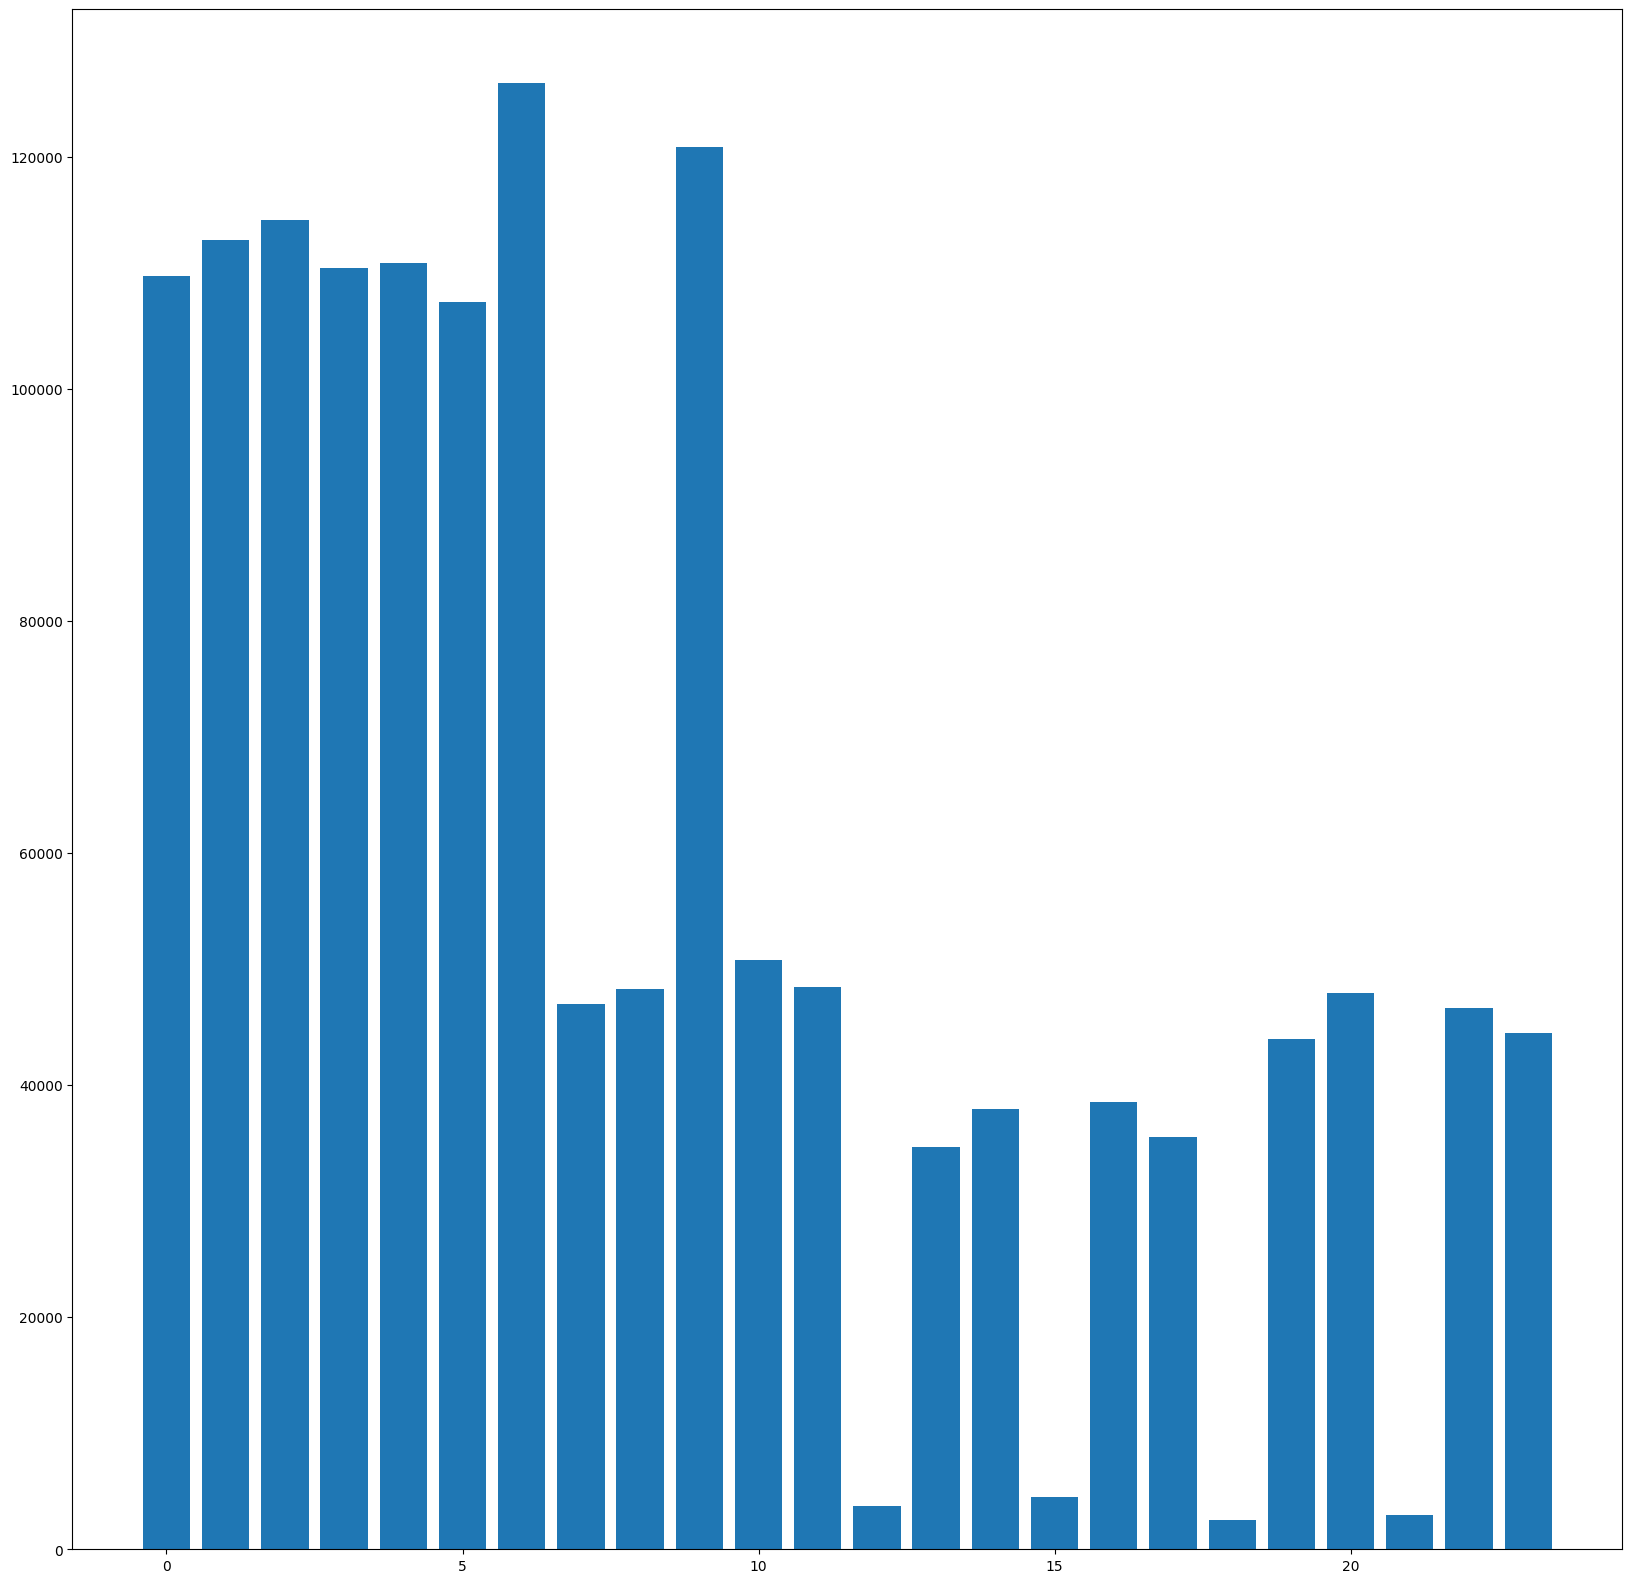

In [88]:
local_energies = []
for filtered_image in filtered_images:
  local_energy = np.sum(filtered_image**2)
  local_energies.append(local_energy)

plt.figure(figsize=(20, 20))
plt.bar(np.arange(len(local_energies)), local_energies)
plt.show()

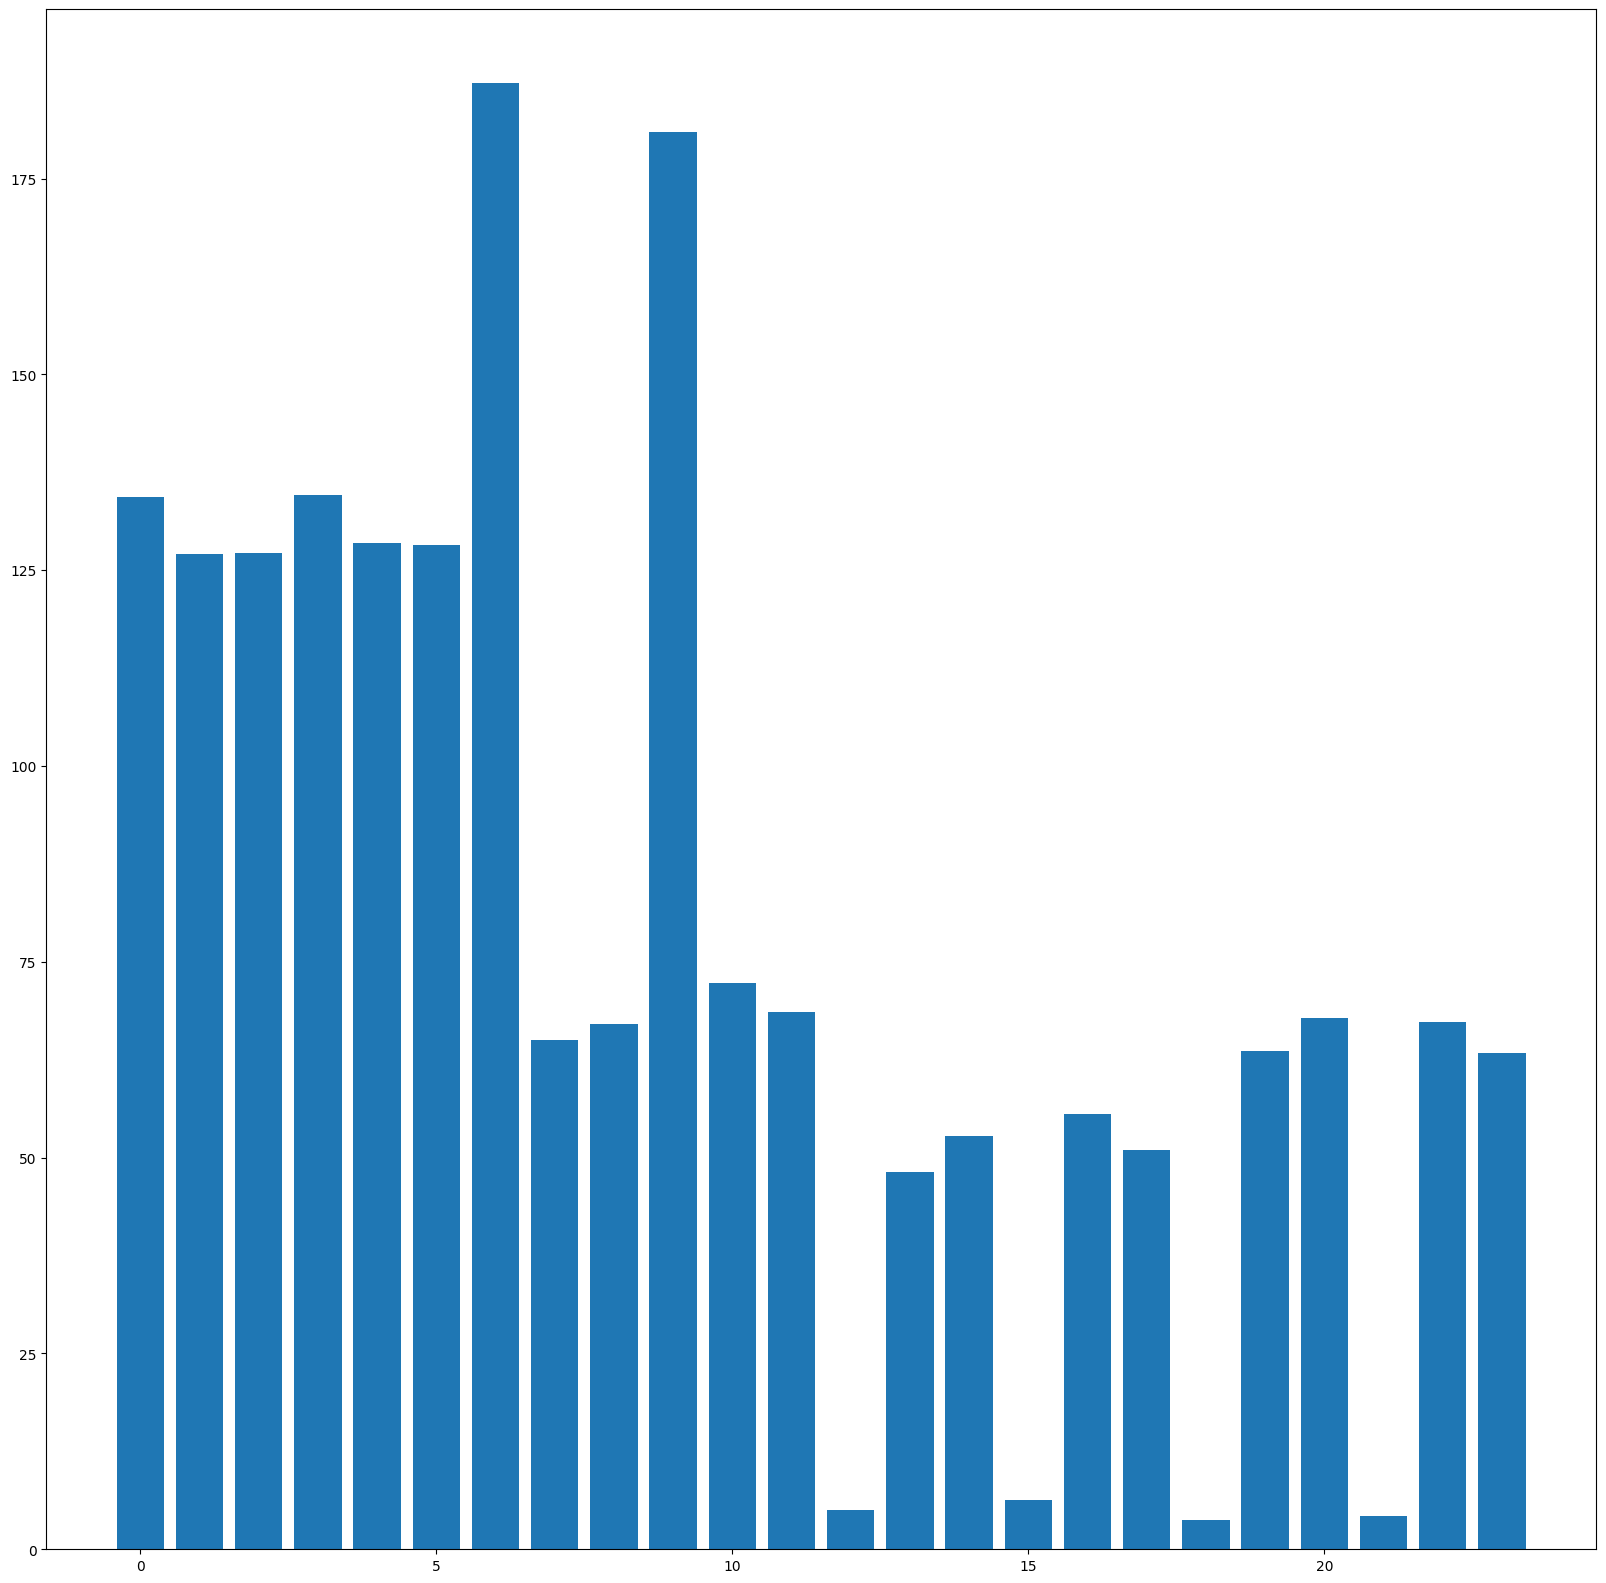

In [89]:
mean_amplitudes = []
for filtered_image in filtered_images:
  mean_amplitude = np.mean(np.abs(filtered_image))
  mean_amplitudes.append(mean_amplitude)

plt.figure(figsize=(20, 20))
plt.bar(np.arange(len(mean_amplitudes)), mean_amplitudes)
plt.show()